# 1. Differences Clustering

In [1]:
import pandas as pd
import numpy as np
calm = pd.read_csv('calm.csv', ';').sort_values(by = ['ID'])
frust = pd.read_csv('frustration.csv', ';').sort_values(by = ['ID'])
#keys = [i for i in calm.columns if 'Тональность' in i] + ['ID']
keys = ['ID']
for i in keys:
    del calm[i], frust[i]
keys = calm.columns
calm, frust = calm.values, frust.values
delta = frust - calm
from sklearn.preprocessing import scale
delta =scale(delta)

In [2]:
folder_results = 'Scaled/'

## Clustering

0 37
1 64


<IPython.core.display.Javascript object>


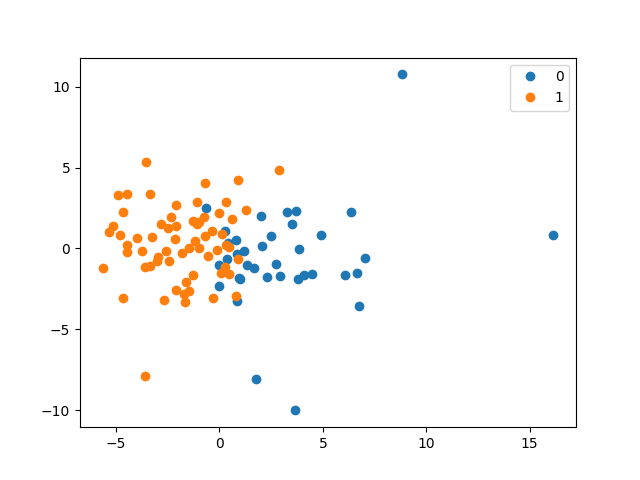

In [3]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
delta_ = PCA(2).fit_transform(delta)
y = KMeans(n_clusters=2, n_init = 1000).fit_predict(PCA(10).fit_transform(delta))
import matplotlib.pylab as plt
%matplotlib notebook
classes = [i for i in range(min(y), max(y)+1)]
D = list()
for y_ in classes:
    delta_1 = delta_[[ind for ind,i in enumerate(delta_) if y[ind]==y_]]
    print(y_, len(delta_1))
for y_ in classes:
    delta_1 = delta_[[ind for ind,i in enumerate(delta_) if y[ind]==y_]]
    D.append(delta[[ind for ind,i in enumerate(delta_) if y[ind]==y_]].mean(axis = 0))
    plt.plot(delta_1[:,0], delta_1[:,1], 'o')
plt.legend(classes)
plt.savefig('Images/' + folder_results +'Cluster.pdf')

## The Most Different Features

<IPython.core.display.Javascript object>


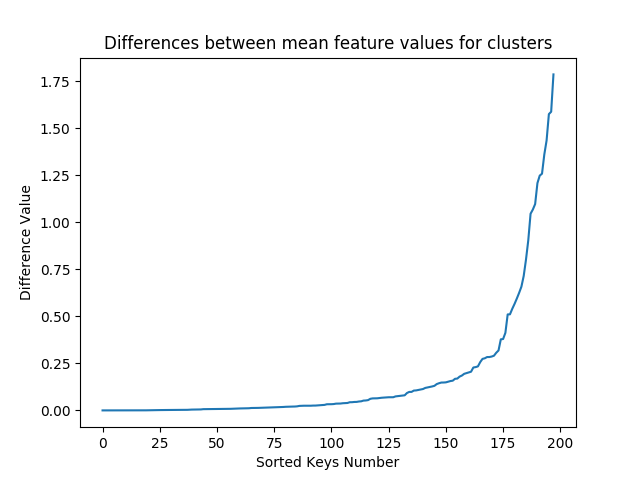

Text(0, 0.5, 'Difference Value')

In [4]:
cluster_delta = list((D[0]-D[1])**2)
cluster_delta = [(i, ind) for ind, i in enumerate(cluster_delta)]
cluster_delta.sort(key = lambda x: x[0])
import matplotlib.pyplot as plt
% matplotlib notebook
plt.plot([i for i in range(len(keys))], [i[0] for i in cluster_delta])
plt.title('Differences between mean feature values for clusters')
plt.xlabel('Sorted Keys Number')
plt.ylabel('Difference Value')

In [5]:
m = 0.7*max([i[0] for i in cluster_delta])
main_keys = [i[1] for i in cluster_delta if i[0] > m]
ind = 0
print('Number of Main Keys',len(main_keys))
keys[main_keys]

Number of Main Keys 6


Index(['Доля глаголов прошедшего времени, первого лица, единственного числа',
       'Часть речи: прилагательное', 'Часть речи: существительное',
       'Средняя длина слов (в количестве символов)', 'Коэффициент Трейгера',
       'Часть речи: местоимение-существительное'],
      dtype='object')

In [6]:
def f(delta_, delta, n = 10):
    M, m = delta.max(axis = 0), delta.min(axis = 0)
    res = dict()
    for i in range(delta_.shape[1]):
        x = np.linspace(m[i], M[i], n)
        res[i] = (delta_[:, i], x)
    return res
D = list()
for y_ in classes:
    delta_1 = (frust-calm)[[ind for ind,i in enumerate(delta_) if y[ind]==y_]]
    D.append(f(delta_1, frust-calm))
ind = 0

0 Доля глаголов прошедшего времени, первого лица, единственного числа


<IPython.core.display.Javascript object>


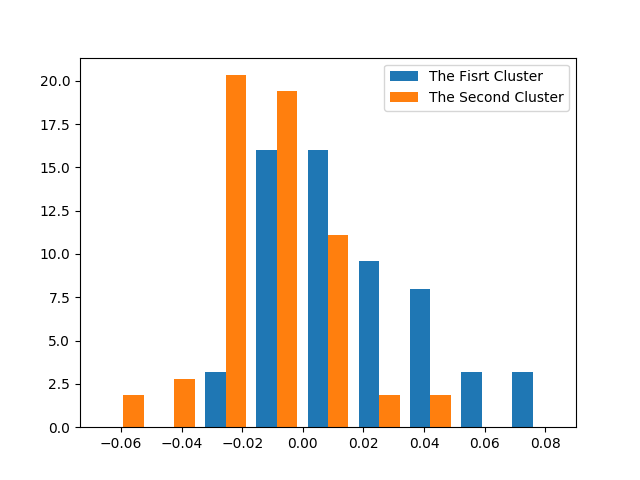

In [7]:
import numpy
from matplotlib import pyplot as plt
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([D[0][main_keys[ind]][0], D[1][main_keys[ind]][0]],
         D[0][main_keys[ind]][1], 
         label=['The Fisrt Cluster', 'The Second Cluster'], 
         density = True)
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

1 Часть речи: прилагательное


<IPython.core.display.Javascript object>


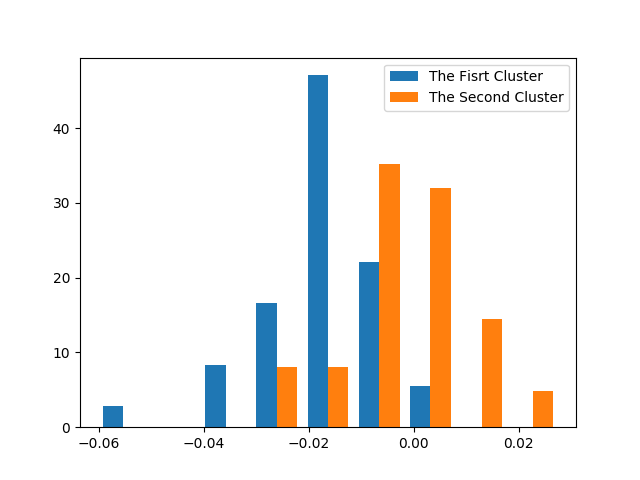

In [8]:
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([D[0][main_keys[ind]][0], D[1][main_keys[ind]][0]],
         D[0][main_keys[ind]][1], 
         label=['The Fisrt Cluster', 'The Second Cluster'], 
         density = True)
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

2 Часть речи: существительное


<IPython.core.display.Javascript object>


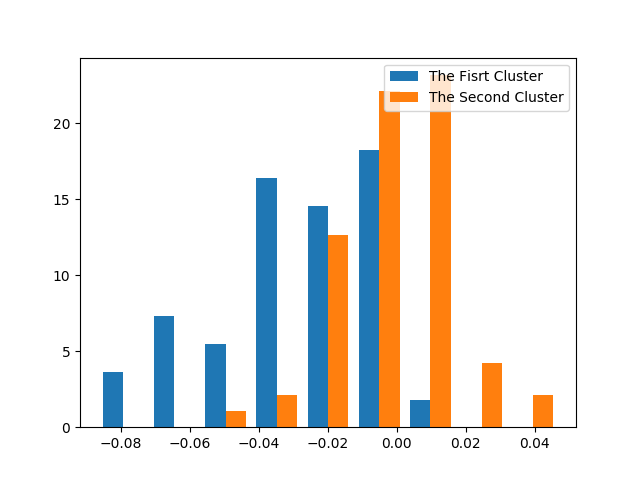

In [9]:
import numpy
from matplotlib import pyplot as plt
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([D[0][main_keys[ind]][0], D[1][main_keys[ind]][0]],
         D[0][main_keys[ind]][1], 
         label=['The Fisrt Cluster', 'The Second Cluster'], 
         density = True)
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

3 Средняя длина слов (в количестве символов)


<IPython.core.display.Javascript object>


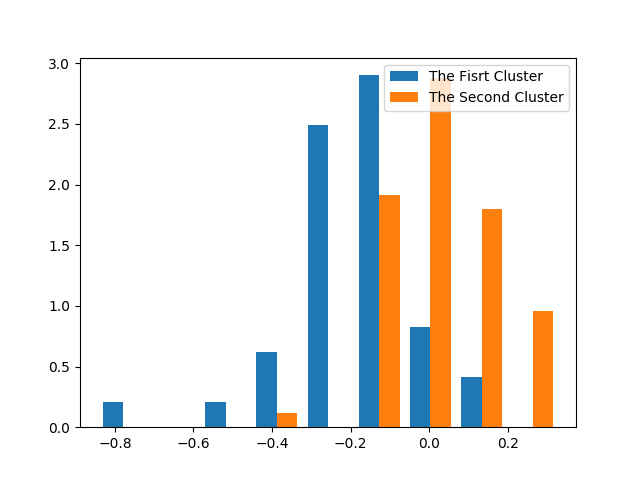

In [10]:
import numpy
from matplotlib import pyplot as plt
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([D[0][main_keys[ind]][0], D[1][main_keys[ind]][0]],
         D[0][main_keys[ind]][1], 
         label=['The Fisrt Cluster', 'The Second Cluster'], 
         density = True)
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

4 Коэффициент Трейгера


<IPython.core.display.Javascript object>


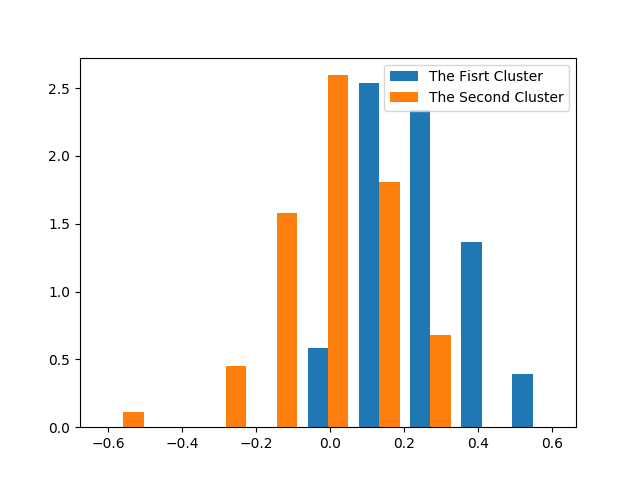

In [11]:
import numpy
from matplotlib import pyplot as plt
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([D[0][main_keys[ind]][0], D[1][main_keys[ind]][0]],
         D[0][main_keys[ind]][1], 
         label=['The Fisrt Cluster', 'The Second Cluster'], 
         density = True)
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

5 Часть речи: местоимение-существительное


<IPython.core.display.Javascript object>


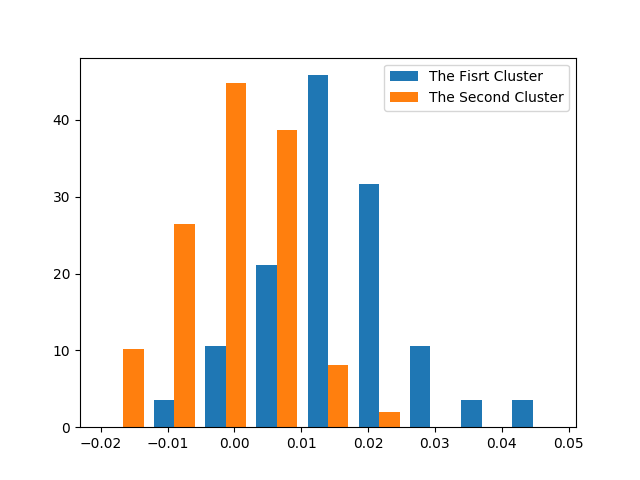

In [12]:
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([D[0][main_keys[ind]][0], D[1][main_keys[ind]][0]],
         D[0][main_keys[ind]][1], 
         label=['The Fisrt Cluster', 'The Second Cluster'], 
         density = True)
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

# 2. Texts Classification

In [13]:
import pandas as pd
import numpy as np
calm = pd.read_csv('calm.csv', ';').sort_values(by = ['ID'])
frust = pd.read_csv('frustration.csv', ';').sort_values(by = ['ID'])
del calm['ID'], frust['ID']
keys = calm.columns
calm, frust = calm.values, frust.values

In [14]:
y = np.hstack((np.zeros(calm.shape[0]), np.ones(frust.shape[0])))
data = np.vstack((calm, frust))
from sklearn.preprocessing import scale
data = scale(data)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression(penalty = 'l1', C = 0.07).fit(data,y)
accuracy_score(y, clf.predict(data))

/home/ased/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7673267326732673

In [16]:
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(clf, prefit=True, max_features = 10)
main_keys = np.argwhere(model.get_support())
main_keys = [i[0] for i in main_keys]
print(len(main_keys), keys[main_keys])

4 Index(['Тональность слов (по округленным значениям)',
       'Число отрицательных приставок и форм (не,ни,бес,без) / Число слов',
       'Сем. роль: ликвидатив', 'Сем. связь: PTN'],
      dtype='object')


In [17]:
def f(delta_, delta, n = 10):
    M, m = delta.max(axis = 0), delta.min(axis = 0)
    res = dict()
    for i in range(delta_.shape[1]):
        x = np.linspace(m[i], M[i], n)
        res[i] = (delta_[:, i], x)
    return res
D = list()
data = np.vstack((calm, frust))
for y_ in classes:
    data_1 = data[[ind for ind,i in enumerate(data) if y[ind]==y_]]
    D.append(f(data_1, data))
ind = 0

0 Тональность слов (по округленным значениям)


<IPython.core.display.Javascript object>


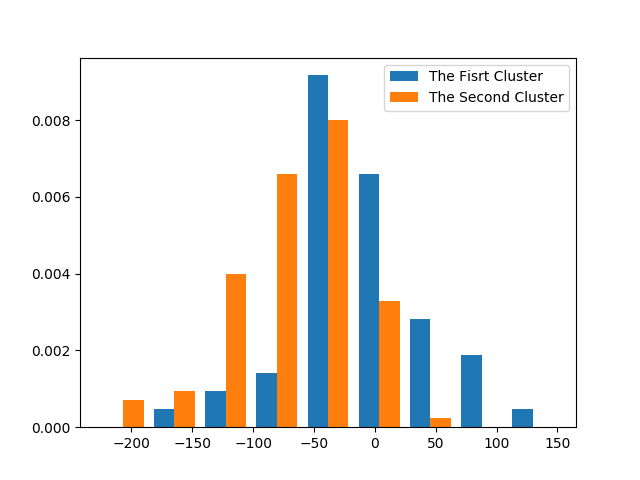

In [18]:
import numpy
from matplotlib import pyplot as plt
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([D[0][main_keys[ind]][0], D[1][main_keys[ind]][0]],
         D[0][main_keys[ind]][1], 
         label=['The Fisrt Cluster', 'The Second Cluster'], 
         density = True)
plt.legend(loc='upper right')
plt.show()
ind+= 1 

1 Число отрицательных приставок и форм (не,ни,бес,без) / Число слов


<IPython.core.display.Javascript object>


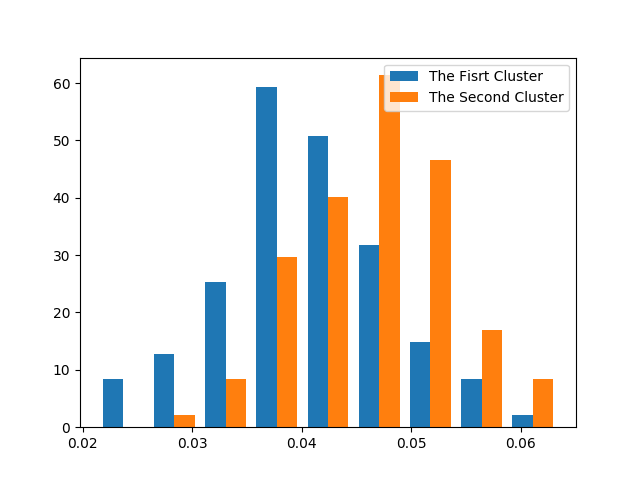

In [19]:
import numpy
from matplotlib import pyplot as plt
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([D[0][main_keys[ind]][0], D[1][main_keys[ind]][0]],
         D[0][main_keys[ind]][1], 
         label=['The Fisrt Cluster', 'The Second Cluster'], 
         density = True)
plt.legend(loc='upper right')
plt.show()
ind+= 1

2 Сем. роль: ликвидатив


<IPython.core.display.Javascript object>


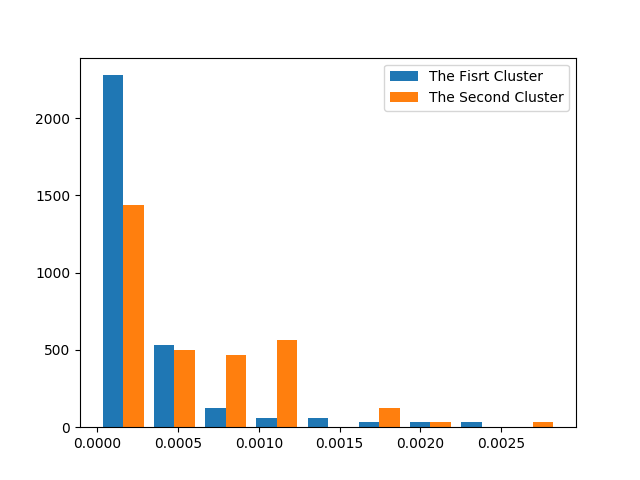

In [20]:
import numpy
from matplotlib import pyplot as plt
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([D[0][main_keys[ind]][0], D[1][main_keys[ind]][0]],
         D[0][main_keys[ind]][1], 
         label=['The Fisrt Cluster', 'The Second Cluster'], 
         density = True)
plt.legend(loc='upper right')
plt.show()
ind+= 1

3 Сем. связь: PTN


<IPython.core.display.Javascript object>


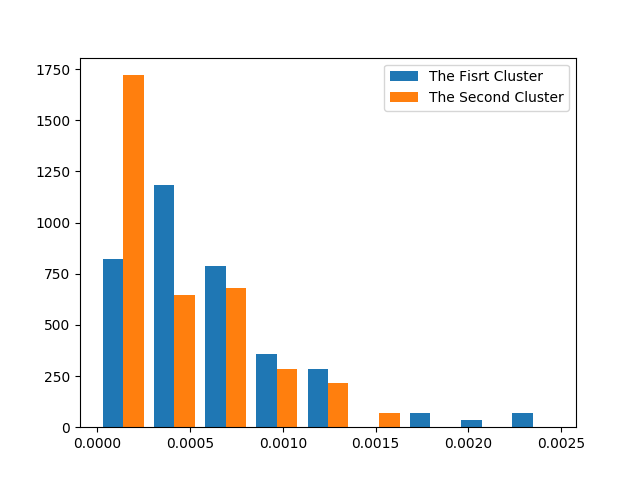

In [21]:
import numpy
from matplotlib import pyplot as plt
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([D[0][main_keys[ind]][0], D[1][main_keys[ind]][0]],
         D[0][main_keys[ind]][1], 
         label=['The Fisrt Cluster', 'The Second Cluster'], 
         density = True)
plt.legend(loc='upper right')
plt.show()
ind+= 1

# 3. Differences Clustering Through Signum

In [22]:
import pandas as pd
import numpy as np
calm = pd.read_csv('calm.csv', ';').sort_values(by = ['ID'])
frust = pd.read_csv('frustration.csv', ';').sort_values(by = ['ID'])
#keys = [i for i in calm.columns if 'Тональность' in i] + ['ID']
keys = ['ID']
for i in keys:
    del calm[i], frust[i]
keys = calm.columns
calm, frust = calm.values, frust.values
delta = frust - calm
delta = np.sign(delta)

In [23]:
folder_results = 'Signum/'

## Clustering

0 53
1 48


<IPython.core.display.Javascript object>


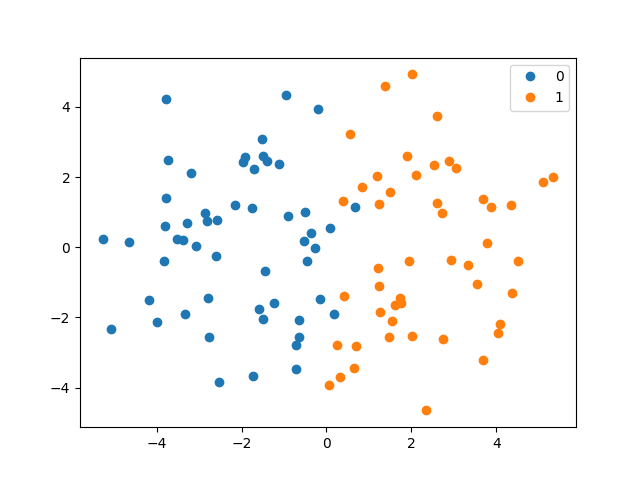

In [24]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
delta_ = PCA(2).fit_transform(delta)
y = KMeans(n_clusters=2, n_init = 1000).fit_predict(PCA(10).fit_transform(delta))
import matplotlib.pylab as plt
%matplotlib notebook
classes = [i for i in range(min(y), max(y)+1)]
D = list()
for y_ in classes:
    delta_1 = delta_[[ind for ind,i in enumerate(delta_) if y[ind]==y_]]
    print(y_, len(delta_1))
for y_ in classes:
    delta_1 = delta_[[ind for ind,i in enumerate(delta_) if y[ind]==y_]]
    D.append(delta[[ind for ind,i in enumerate(delta_) if y[ind]==y_]].mean(axis = 0))
    plt.plot(delta_1[:,0], delta_1[:,1], 'o')
plt.legend(classes)
plt.savefig('Images/' + folder_results +'Cluster.pdf')

## The Most Different Features

<IPython.core.display.Javascript object>


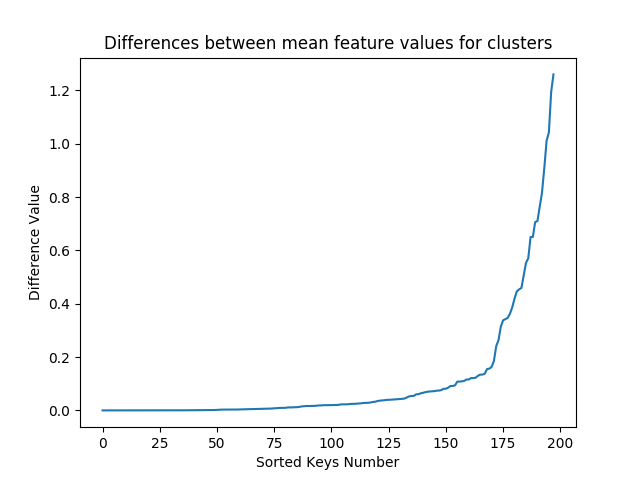

Text(0, 0.5, 'Difference Value')

In [25]:
cluster_delta = list((D[0]-D[1])**2)
cluster_delta = [(i, ind) for ind, i in enumerate(cluster_delta)]
cluster_delta.sort(key = lambda x: x[0])
import matplotlib.pyplot as plt
% matplotlib notebook
plt.plot([i for i in range(len(keys))], [i[0] for i in cluster_delta])
plt.title('Differences between mean feature values for clusters')
plt.xlabel('Sorted Keys Number')
plt.ylabel('Difference Value')

In [26]:
m = 0.7*max(((D[0]-D[1])**2))
main_keys = [i[1] for i in cluster_delta if i[0] > m]
ind = 0
print('Number of Main Keys',len(main_keys))
keys[main_keys]

Number of Main Keys 5


Index(['Средняя длина слов (в количестве символов)',
       'Коэффициент логической связности', 'Сем. роль: делибератив',
       'Средняя глубина синтаксического дерева',
       'Средняя длина предложения (в количестве слов)'],
      dtype='object')

In [27]:
def f(delta_, delta, n = 10):
    M, m = delta.max(axis = 0), delta.min(axis = 0)
    res = dict()
    for i in range(delta_.shape[1]):
        x = np.linspace(m[i], M[i], n)
        res[i] = (delta_[:, i], x)
    return res
D = list()
for y_ in classes:
    delta_1 = (frust-calm)[[ind for ind,i in enumerate(delta_) if y[ind]==y_]]
    D.append(f(delta_1, frust-calm))
ind = 0

0 Средняя длина слов (в количестве символов)


<IPython.core.display.Javascript object>


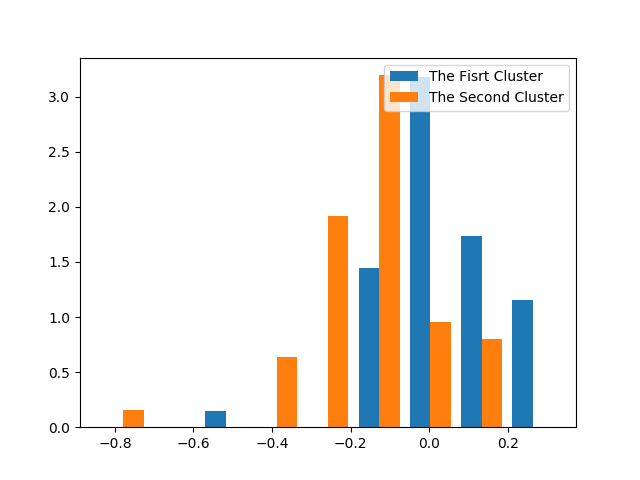

In [28]:
import numpy
from matplotlib import pyplot as plt
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([D[0][main_keys[ind]][0], D[1][main_keys[ind]][0]],
         D[0][main_keys[ind]][1], 
         label=['The Fisrt Cluster', 'The Second Cluster'], 
         density = True)
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

1 Коэффициент логической связности


<IPython.core.display.Javascript object>


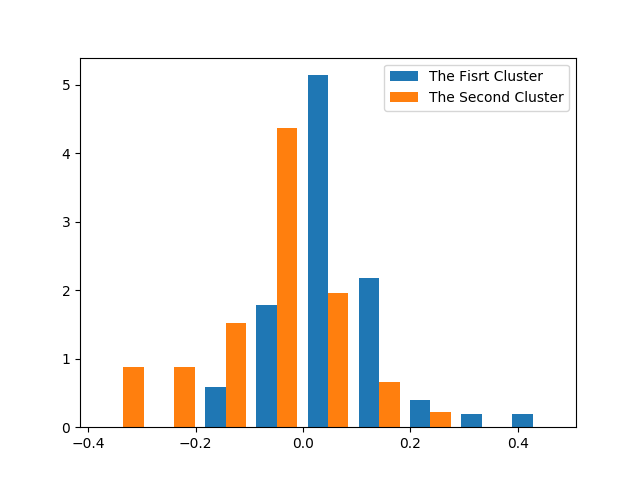

In [29]:
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([D[0][main_keys[ind]][0], D[1][main_keys[ind]][0]],
         D[0][main_keys[ind]][1], 
         label=['The Fisrt Cluster', 'The Second Cluster'], 
         density = True)
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

2 Сем. роль: делибератив


<IPython.core.display.Javascript object>


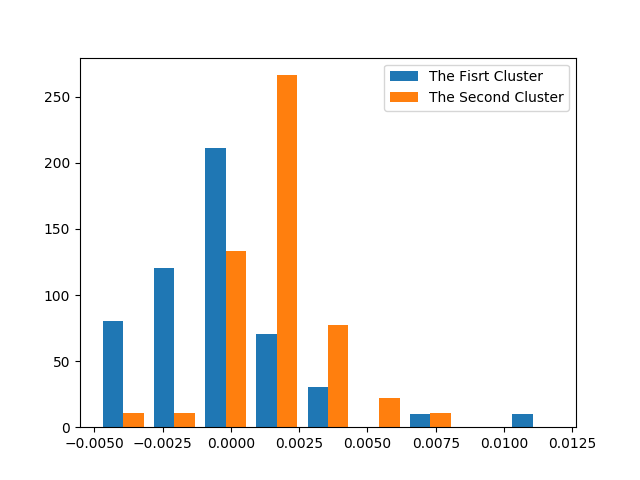

In [30]:
import numpy
from matplotlib import pyplot as plt
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([D[0][main_keys[ind]][0], D[1][main_keys[ind]][0]],
         D[0][main_keys[ind]][1], 
         label=['The Fisrt Cluster', 'The Second Cluster'], 
         density = True)
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

3 Средняя глубина синтаксического дерева


<IPython.core.display.Javascript object>


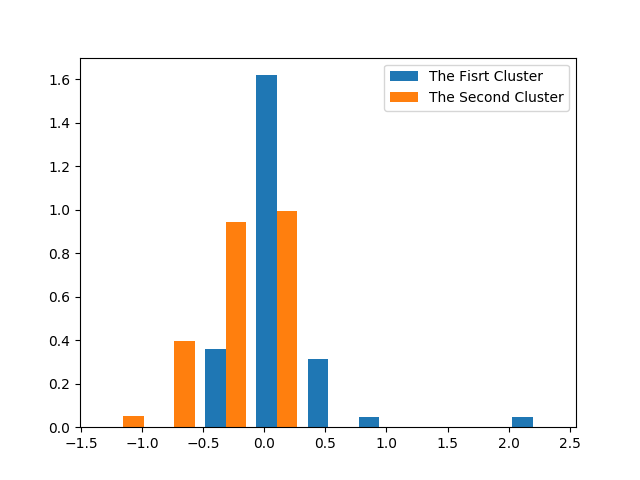

In [31]:
import numpy
from matplotlib import pyplot as plt
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([D[0][main_keys[ind]][0], D[1][main_keys[ind]][0]],
         D[0][main_keys[ind]][1], 
         label=['The Fisrt Cluster', 'The Second Cluster'], 
         density = True)
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

4 Средняя длина предложения (в количестве слов)


<IPython.core.display.Javascript object>


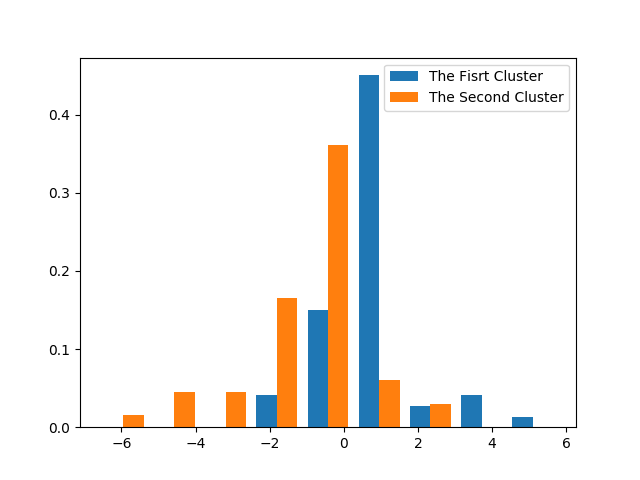

In [32]:
import numpy
from matplotlib import pyplot as plt
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([D[0][main_keys[ind]][0], D[1][main_keys[ind]][0]],
         D[0][main_keys[ind]][1], 
         label=['The Fisrt Cluster', 'The Second Cluster'], 
         density = True)
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

# 4. Differences Clustering Through Sigmoid

In [33]:
import pandas as pd
import numpy as np
calm = pd.read_csv('calm.csv', ';').sort_values(by = ['ID'])
frust = pd.read_csv('frustration.csv', ';').sort_values(by = ['ID'])
#keys = [i for i in calm.columns if 'Тональность' in i] + ['ID']
keys = ['ID']
for i in keys:
    del calm[i], frust[i]
keys = calm.columns
calm, frust = calm.values, frust.values
from sklearn.preprocessing import scale
delta = 2./(1.+np.exp(-scale(frust-calm)))-1.

In [34]:
folder_results = 'Sigmoid/'

## Clustering

0 43
1 58


<IPython.core.display.Javascript object>


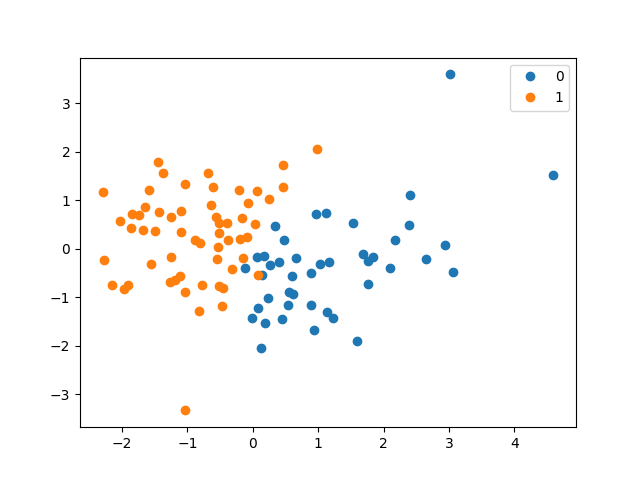

In [35]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
delta_ = PCA(2).fit_transform(delta)
y = KMeans(n_clusters=2, n_init = 1000).fit_predict(PCA(10).fit_transform(delta))
import matplotlib.pylab as plt
%matplotlib notebook
classes = [i for i in range(min(y), max(y)+1)]
D = list()
for y_ in classes:
    delta_1 = delta_[[ind for ind,i in enumerate(delta_) if y[ind]==y_]]
    print(y_, len(delta_1))
for y_ in classes:
    delta_1 = delta_[[ind for ind,i in enumerate(delta_) if y[ind]==y_]]
    D.append(delta[[ind for ind,i in enumerate(delta_) if y[ind]==y_]].mean(axis = 0))
    plt.plot(delta_1[:,0], delta_1[:,1], 'o')
plt.legend(classes)
plt.savefig('Images/' + folder_results +'Cluster.pdf')

## The Most Different Features

<IPython.core.display.Javascript object>


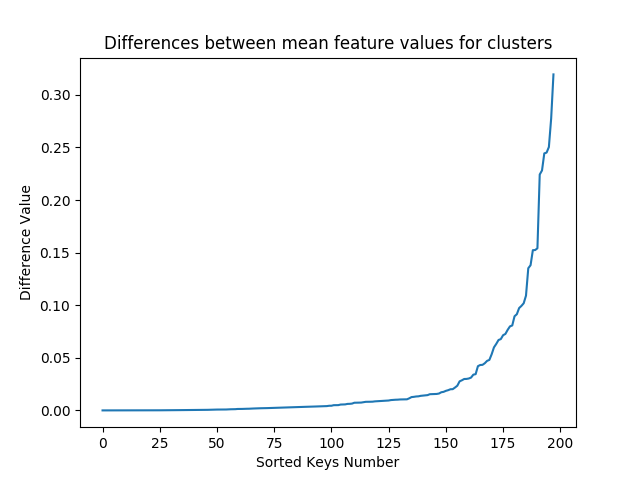

Text(0, 0.5, 'Difference Value')

In [36]:
cluster_delta = list((D[0]-D[1])**2)
cluster_delta = [(i, ind) for ind, i in enumerate(cluster_delta)]
cluster_delta.sort(key = lambda x: x[0])
import matplotlib.pyplot as plt
% matplotlib notebook
plt.plot([i for i in range(len(keys))], [i[0] for i in cluster_delta])
plt.title('Differences between mean feature values for clusters')
plt.xlabel('Sorted Keys Number')
plt.ylabel('Difference Value')

In [37]:
m = 0.7*max(((D[0]-D[1])**2))
main_keys = [i[1] for i in cluster_delta if i[0] > m]
ind = 0
print('Number of Main Keys',len(main_keys))
keys[main_keys]

Number of Main Keys 7


Index(['Часть речи: глагол', 'Часть речи: прилагательное',
       'Часть речи: существительное',
       'Часть речи: местоимение-существительное',
       'Средняя длина слов (в количестве символов)',
       'Коэффициент опредмеченности действия (кол. глаголов / кол. существительных)',
       'Коэффициент Трейгера'],
      dtype='object')

In [38]:
def f(delta_, delta, n = 10):
    M, m = delta.max(axis = 0), delta.min(axis = 0)
    res = dict()
    for i in range(delta_.shape[1]):
        x = np.linspace(m[i], M[i], n)
        res[i] = (delta_[:, i], x)
    return res
D = list()
for y_ in classes:
    delta_1 = (frust-calm)[[ind for ind,i in enumerate(delta_) if y[ind]==y_]]
    D.append(f(delta_1, frust-calm))
ind = 0

0 Часть речи: глагол


<IPython.core.display.Javascript object>


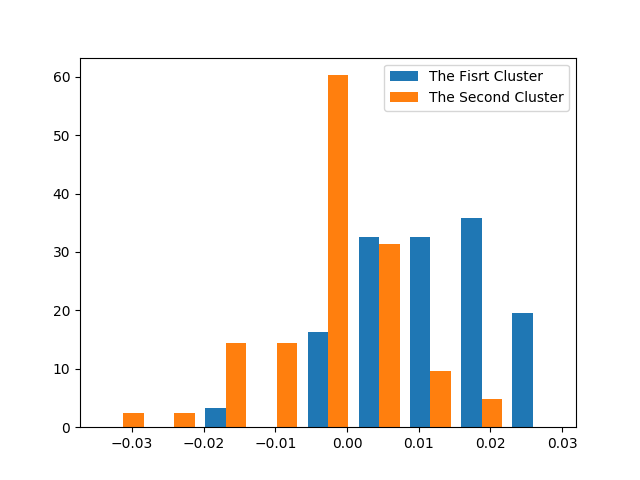

In [39]:
import numpy
from matplotlib import pyplot as plt
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([D[0][main_keys[ind]][0], D[1][main_keys[ind]][0]],
         D[0][main_keys[ind]][1], 
         label=['The Fisrt Cluster', 'The Second Cluster'], 
         density = True)
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

1 Часть речи: прилагательное


<IPython.core.display.Javascript object>


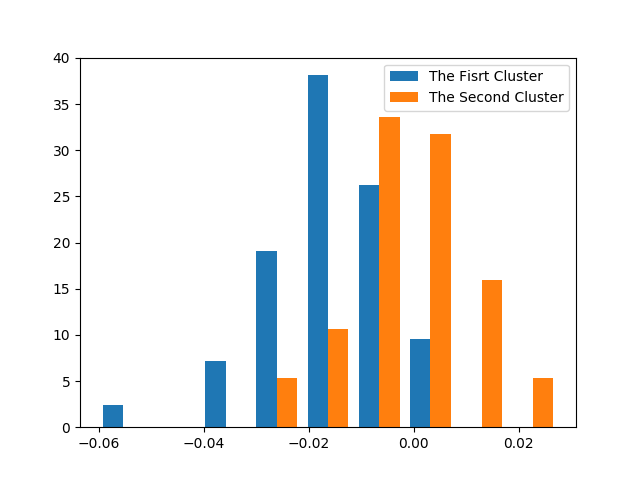

In [40]:
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([D[0][main_keys[ind]][0], D[1][main_keys[ind]][0]],
         D[0][main_keys[ind]][1], 
         label=['The Fisrt Cluster', 'The Second Cluster'], 
         density = True)
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

2 Часть речи: существительное


<IPython.core.display.Javascript object>


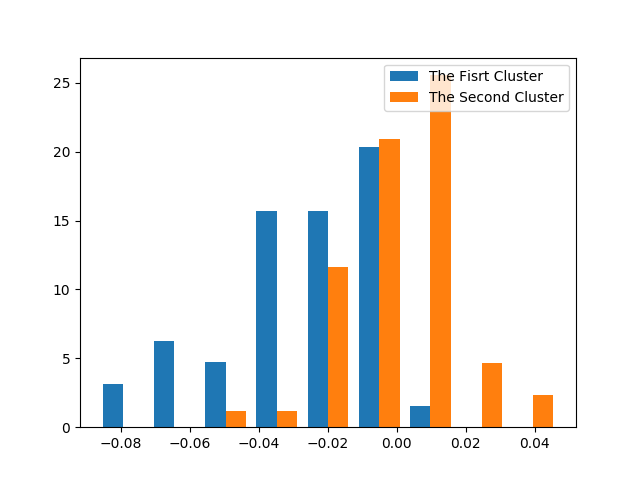

In [41]:
import numpy
from matplotlib import pyplot as plt
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([D[0][main_keys[ind]][0], D[1][main_keys[ind]][0]],
         D[0][main_keys[ind]][1], 
         label=['The Fisrt Cluster', 'The Second Cluster'], 
         density = True)
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

3 Часть речи: местоимение-существительное


<IPython.core.display.Javascript object>


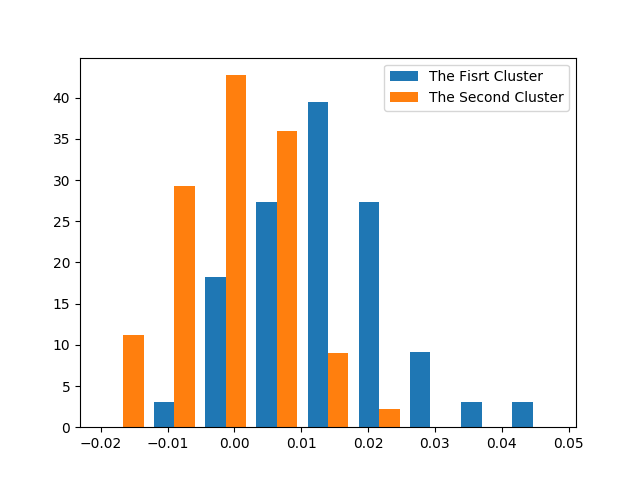

In [42]:
import numpy
from matplotlib import pyplot as plt
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([D[0][main_keys[ind]][0], D[1][main_keys[ind]][0]],
         D[0][main_keys[ind]][1], 
         label=['The Fisrt Cluster', 'The Second Cluster'], 
         density = True)
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

4 Средняя длина слов (в количестве символов)


<IPython.core.display.Javascript object>


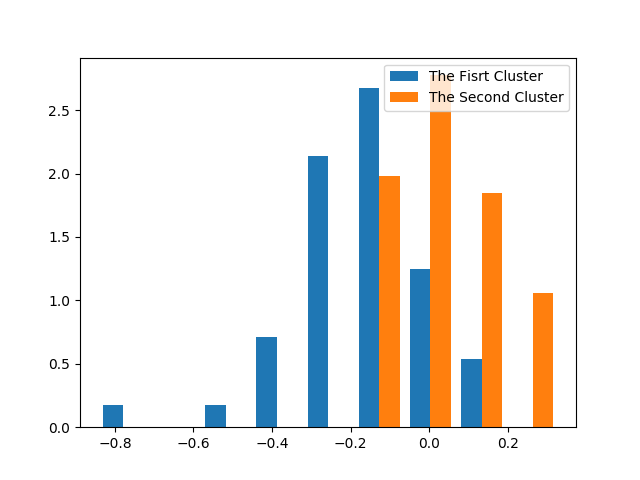

In [43]:
import numpy
from matplotlib import pyplot as plt
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([D[0][main_keys[ind]][0], D[1][main_keys[ind]][0]],
         D[0][main_keys[ind]][1], 
         label=['The Fisrt Cluster', 'The Second Cluster'], 
         density = True)
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

5 Коэффициент опредмеченности действия (кол. глаголов / кол. существительных)


<IPython.core.display.Javascript object>


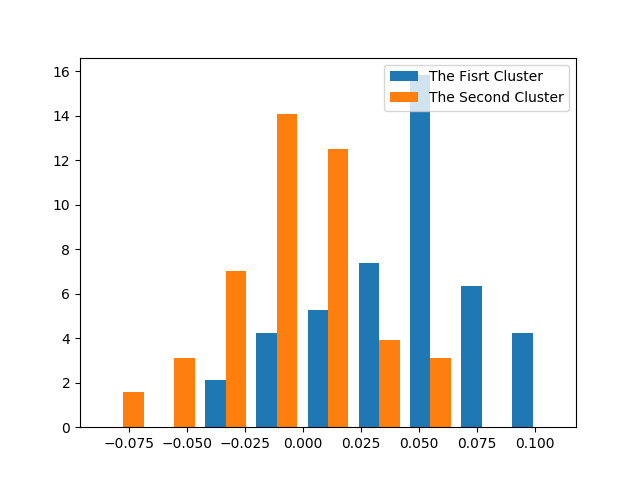

In [44]:
import numpy
from matplotlib import pyplot as plt
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([D[0][main_keys[ind]][0], D[1][main_keys[ind]][0]],
         D[0][main_keys[ind]][1], 
         label=['The Fisrt Cluster', 'The Second Cluster'], 
         density = True)
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

6 Коэффициент Трейгера


<IPython.core.display.Javascript object>


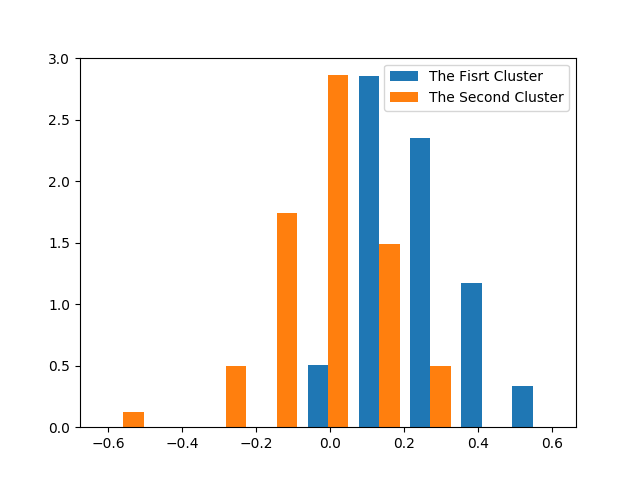

In [45]:
import numpy
from matplotlib import pyplot as plt
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([D[0][main_keys[ind]][0], D[1][main_keys[ind]][0]],
         D[0][main_keys[ind]][1], 
         label=['The Fisrt Cluster', 'The Second Cluster'], 
         density = True)
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

# 5. Differences Clustering Through Sigmoid : Many Clusters

In [46]:
import pandas as pd
import numpy as np
calm = pd.read_csv('calm.csv', ';').sort_values(by = ['ID'])
frust = pd.read_csv('frustration.csv', ';').sort_values(by = ['ID'])
#keys = [i for i in calm.columns if 'Тональность' in i] + ['ID']
keys = ['ID']
for i in keys:
    del calm[i], frust[i]
keys = calm.columns
calm, frust = calm.values, frust.values
from sklearn.preprocessing import scale
delta = 2./(1.+np.exp(-scale(frust-calm)))-1.

In [47]:
folder_results = 'Sigmoid_5/'

## Clustering

0 14
1 16
2 30
3 17
4 24


<IPython.core.display.Javascript object>


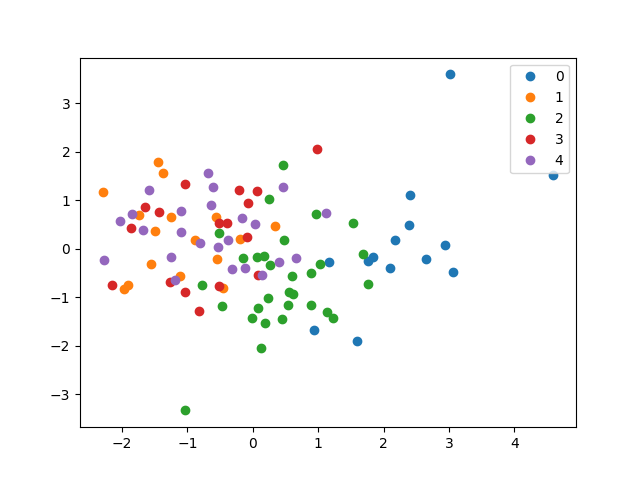

In [48]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
delta_ = PCA(2).fit_transform(delta)
y = KMeans(n_clusters=5, n_init = 1000).fit_predict(PCA(10).fit_transform(delta))
import matplotlib.pylab as plt
%matplotlib notebook
classes = [i for i in range(min(y), max(y)+1)]
D = list()
for y_ in classes:
    delta_1 = delta_[[ind for ind,i in enumerate(delta_) if y[ind]==y_]]
    print(y_, len(delta_1))
for y_ in classes:
    delta_1 = delta_[[ind for ind,i in enumerate(delta_) if y[ind]==y_]]
    D.append(delta[[ind for ind,i in enumerate(delta_) if y[ind]==y_]].mean(axis = 0))
    plt.plot(delta_1[:,0], delta_1[:,1], 'o')
plt.legend(classes)

## The Most Different Features

<IPython.core.display.Javascript object>


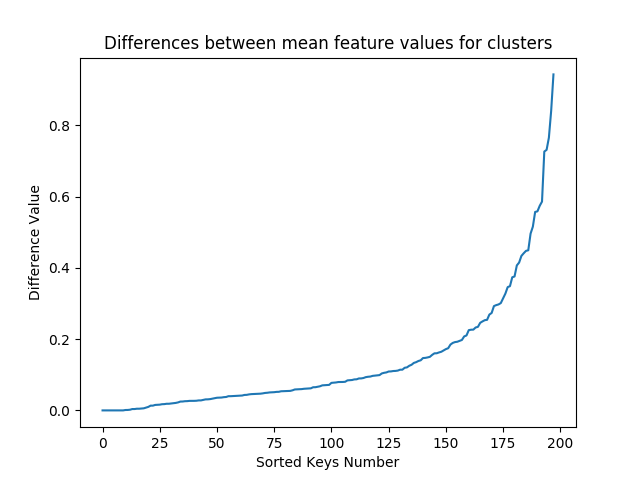

Text(0, 0.5, 'Difference Value')

In [49]:
def get_max(D):
    res = list()
    for i in D:
        for j in D:
            res.append((i-j)**2)
    res = np.array(res)
    return res.max(axis = 0)
cluster_delta = get_max(D)
cluster_delta = [(i, ind) for ind, i in enumerate(cluster_delta)]
cluster_delta.sort(key = lambda x: x[0])
import matplotlib.pyplot as plt
% matplotlib notebook
plt.plot([i for i in range(len(keys))], [i[0] for i in cluster_delta])
plt.title('Differences between mean feature values for clusters')
plt.xlabel('Sorted Keys Number')
plt.ylabel('Difference Value')

In [50]:
m = 0.7*max([i[0] for i in cluster_delta])
main_keys = [i[1] for i in cluster_delta if i[0] > m]
ind = 0
print('Number of Main Keys',len(main_keys))
keys[main_keys]

Number of Main Keys 5


Index(['Часть речи: местоимение-существительное', 'Коэффициент Трейгера',
       'Часть речи: существительное',
       'Средняя длина слов (в количестве символов)',
       'Часть речи: прилагательное'],
      dtype='object')

In [51]:
def f(delta_, delta, n = 10):
    M, m = delta.max(axis = 0), delta.min(axis = 0)
    res = dict()
    for i in range(delta_.shape[1]):
        x = np.linspace(m[i], M[i], n)
        res[i] = (delta_[:, i], x)
    return res
D = list()
for y_ in classes:
    delta_1 = (frust-calm)[[ind for ind,i in enumerate(delta_) if y[ind]==y_]]
    D.append(f(delta_1, frust-calm))
ind = 0

0 Часть речи: местоимение-существительное


<IPython.core.display.Javascript object>


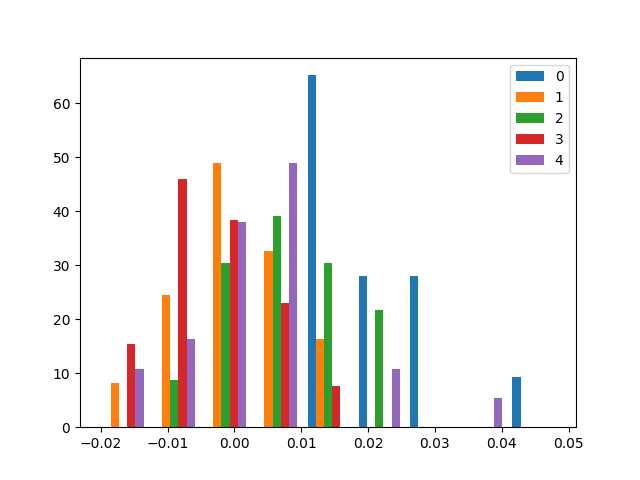

In [52]:
import numpy
from matplotlib import pyplot as plt
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

1 Коэффициент Трейгера


<IPython.core.display.Javascript object>


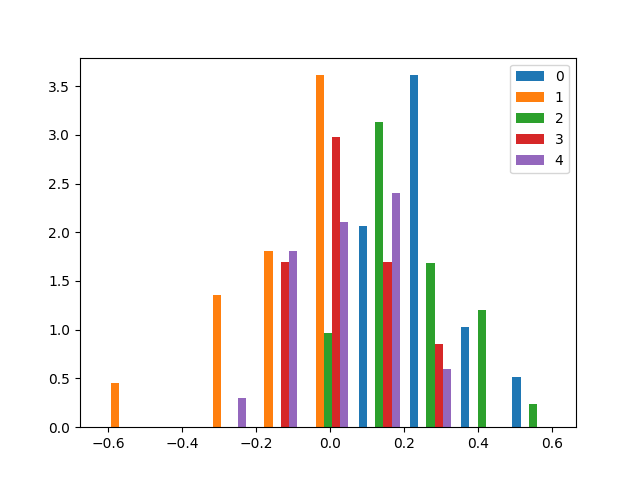

In [53]:
import numpy
from matplotlib import pyplot as plt
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

2 Часть речи: существительное


<IPython.core.display.Javascript object>


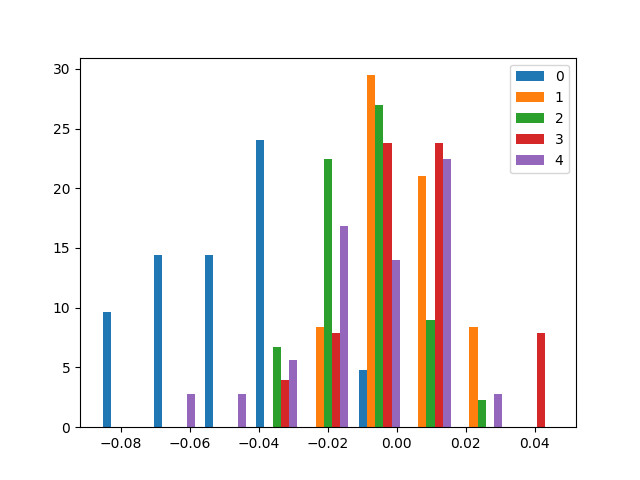

In [54]:
import numpy
from matplotlib import pyplot as plt
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

3 Средняя длина слов (в количестве символов)


<IPython.core.display.Javascript object>


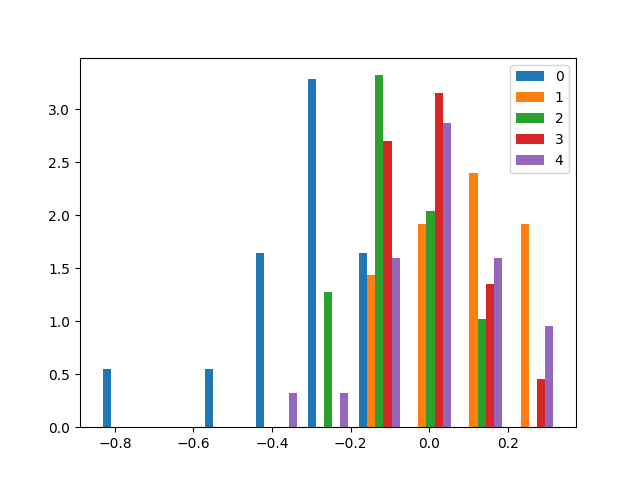

In [55]:
import numpy
from matplotlib import pyplot as plt
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

4 Часть речи: прилагательное


<IPython.core.display.Javascript object>


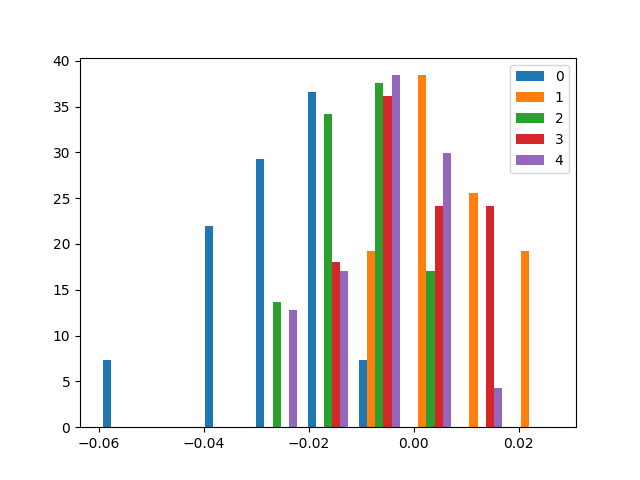

In [56]:
import numpy
from matplotlib import pyplot as plt
% matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')